# Week2 Experiment1 - Removing negative values in data 
### Summary: 
Week1: Logistic regression with L1,L2 and ElasticNet regulariisation <br>
Kaggle result: 0.70770 (for L2) 

Week2 Exp1: Data cleaning - removing negative values <br>
Much less AUC than week1 - therefore, negative valued will be used in further model experiments.
Kaggle result: 0.70677


### 1. Import packages and data

In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [149]:
#loading training dataset 
df_train_original = pd.read_csv('../data/raw/train.csv')
df_test_original = pd.read_csv('../data/raw/test.csv')

### 2. Data analysis 
Summary: <br>
1) There are negative values for Games played (GP), 3 Point attempts (3PMade), 3 Point attempts, 3P%, FT%, BLK (Blocks) <br>
2) The dataset for the dependant variable is imnbalanced. The plot shows that the dataset is not balanced. There are more 1's for Target_5yrs than 0. 


In [114]:
#exploration 
df_train_original.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab0306a9d0>,
      dtype=object)

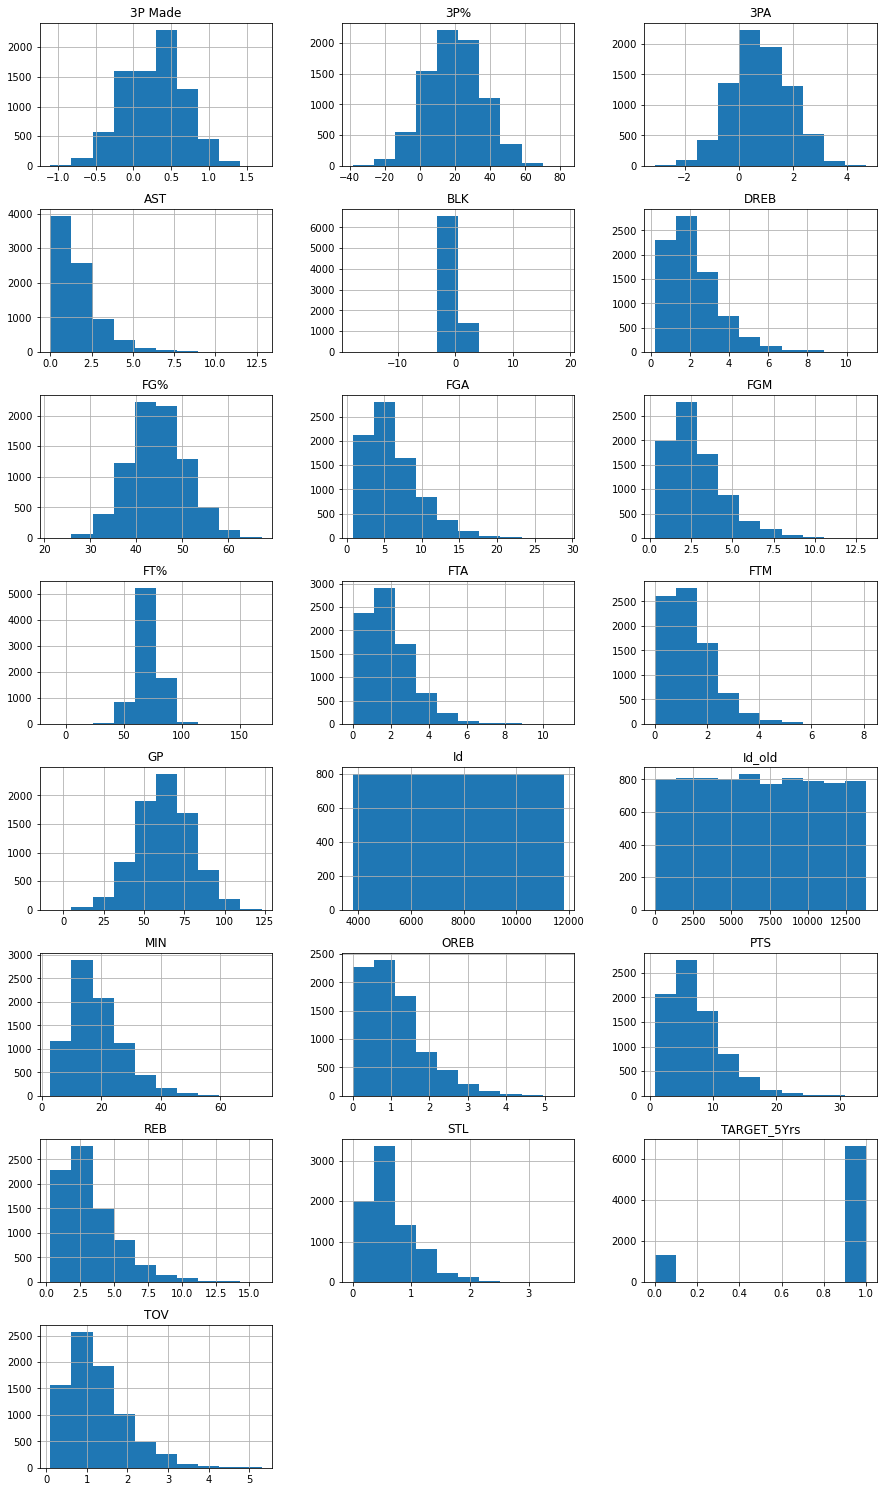

In [115]:
df_train_original.hist(figsize=(15,30),layout=(9,3))

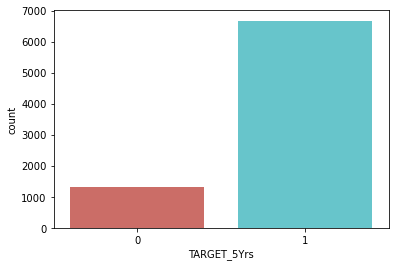

In [116]:
sns.countplot(x='TARGET_5Yrs',data=df_train_original, palette='hls')
plt.show()

In [117]:
df_train_original.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [118]:
#Remove negative values for Games played (GP), 3 Point attempts (3PMade), 3 Point attempts, 3P%, FT%, BLK (Blocks)
df_train_original = df_train_original[(df_train_original['GP']>0) & 
                                      (df_train_original['3P Made']>0) & 
                                      (df_train_original['3PA']>0)& 
                                      (df_train_original['3P%']>0) & 
                                      (df_train_original['FT%']>0) & 
                                      (df_train_original['BLK']>0) ]


In [119]:
df_train_original.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,...,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,6933.864674,7774.158649,65.902332,21.688946,8.633941,3.310253,7.379568,44.577478,0.447716,1.312682,...,2.186978,72.452867,1.140015,2.516837,3.664942,1.850607,0.745262,0.353474,1.420165,0.857143
std,3967.015271,2299.434279,16.779484,9.273002,4.574644,1.798065,3.811528,5.720228,0.267761,0.750439,...,1.286082,9.682130,0.713862,1.389092,2.015981,1.417043,0.428322,0.529265,0.761846,0.349970
min,4.000000,3799.000000,3.000000,3.800000,0.900000,0.300000,1.000000,25.700000,0.100000,0.100000,...,0.000000,37.900000,0.000000,0.300000,0.400000,0.000000,0.000000,0.100000,0.100000,0.000000
25%,3555.750000,5782.750000,55.000000,14.800000,5.200000,2.000000,4.600000,40.700000,0.200000,0.700000,...,1.200000,66.500000,0.600000,1.500000,2.200000,0.800000,0.400000,0.200000,0.900000,1.000000
50%,6867.000000,7767.000000,66.000000,20.200000,7.800000,3.000000,6.650000,44.500000,0.400000,1.200000,...,2.000000,72.300000,1.000000,2.200000,3.200000,1.500000,0.700000,0.300000,1.300000,1.000000
75%,10418.250000,9748.500000,77.000000,27.100000,11.100000,4.300000,9.500000,48.400000,0.600000,1.800000,...,2.900000,78.000000,1.500000,3.200000,4.700000,2.500000,1.000000,0.400000,1.800000,1.000000
max,13798.000000,11796.000000,123.000000,73.800000,34.200000,13.100000,28.900000,64.700000,1.700000,4.700000,...,11.100000,132.500000,5.500000,10.800000,14.600000,12.800000,3.600000,18.900000,5.300000,1.000000


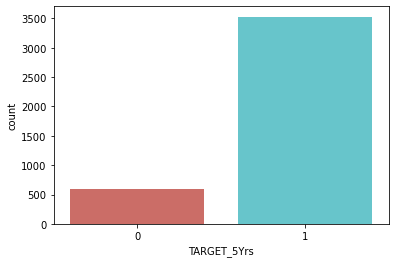

In [120]:
sns.countplot(x='TARGET_5Yrs',data=df_train_original, palette='hls')
plt.show()

### Observations after data cleaning: 
After removing negative values, the total row count reduces from 8000 to 4116 rows. <br> 
The dataset is still imbalanced. 

### 3. Predictions

In [121]:
# Save target variable
target = df_train_original.pop('TARGET_5Yrs')

In [122]:
#dropping off Ids
df_train_original.drop(['Id','Id_old'], axis=1, inplace=True)

#dropping off correlated fields : for example FG% (Field goals percent), 3P% (3 Point Attempts), FT% (Free Throw Percent),REB(Rebounds)
#df_train_original.drop(['FG%','3P%','FT%'], axis=1, inplace=True)

In [123]:
#feature scaling
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train_original)

from joblib import dump
#Save the scaler into the folder models and call the file scaler.joblib
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

In [124]:
#Splitting the training data (80%) randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)

x_train, x_val, y_train, y_val = train_test_split(df_train, target, test_size=0.2, random_state=8)

#save models 
np.save('../data/processed/X_train', x_train)
np.save('../data/processed/X_val',   x_val)
np.save('../data/processed/y_train', y_train)
np.save('../data/processed/y_val',   y_val)


In [125]:
#baseline model - logistic with no penality 
lr = LogisticRegression(penalty='none')
lr.fit(x_train, y_train)
y_val_preds = lr.predict(x_val)
y_val_preds_prob = lr.predict_proba(x_val)

#save model as logistic_base 
dump(lr,  '../models/logistic0.joblib')

['../models/logistic0.joblib']

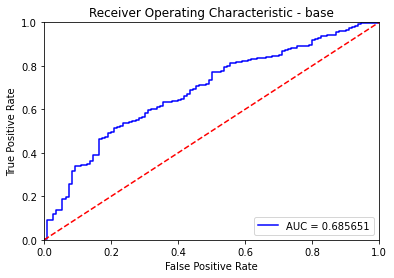

In [126]:
#AUC_ROC
preds = y_val_preds_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
np.round(lr.coef_,1)

array([[ 0.5,  0. , -1.2,  1.3, -0.2,  0.1,  0.5, -0.5,  0.1,  0.1,  0.3,
         0.1,  0.6,  0.9, -1.4,  0.3, -0.2,  0.2, -0.1]])

In [128]:
#LR1 - regularisation
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_l1.fit(x_train, y_train)
y_val_preds_l1 = lr_l1.predict(x_val)
y_val_preds_prob_l1 = lr_l1.predict_proba(x_val)

#save model as logistic_base 
dump(lr,  '../models/logistic_l1.joblib')

['../models/logistic_l1.joblib']

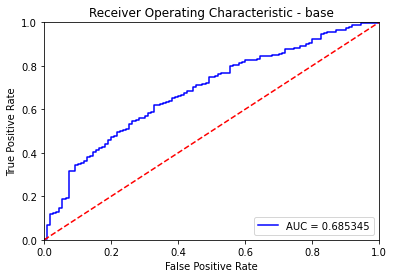

In [129]:
#AUC_ROC
preds_l1 = y_val_preds_prob_l1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_l1)
roc_auc_l1 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_l1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
np.round(lr_l1.coef_,1)

array([[ 0.5,  0. ,  0. ,  0.1,  0. ,  0.2,  0.5, -0.5,  0.1,  0. ,  0.1,
         0. ,  0.4,  0.3, -0.5,  0.3, -0.1,  0.2, -0.1]])

In [131]:
#LR2 - regularisation
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')
lr_l2.fit(x_train, y_train)
y_val_preds_l2 = lr_l2.predict(x_val)
y_val_preds_prob_l2 = lr_l2.predict_proba(x_val)

#save model as logistic 
dump(lr,  '../models/logistic_l2.joblib')

['../models/logistic_l2.joblib']

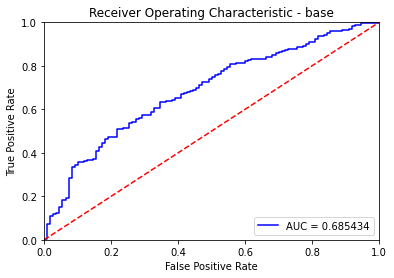

In [132]:
#AUC_ROC
preds_l2 = y_val_preds_prob_l2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_l2)
roc_auc_l2 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_l2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
np.round(lr_l2.coef_,1)

array([[ 0.5,  0. , -0.5,  0.6, -0.1,  0.2,  0.5, -0.5,  0.1,  0. ,  0.2,
         0. ,  0.5,  0.5, -0.8,  0.3, -0.2,  0.2, -0.1]])

In [134]:
#elasticnet - regularisation
lr_elastic = LogisticRegression(solver='saga')
lr_elastic.fit(x_train, y_train)
y_val_preds_elastic = lr_elastic.predict(x_val)
y_val_preds_prob_elastic = lr_elastic.predict_proba(x_val)

#save model as logistic 
dump(lr,  '../models/logistic_elastic.joblib')

['../models/logistic_elastic.joblib']

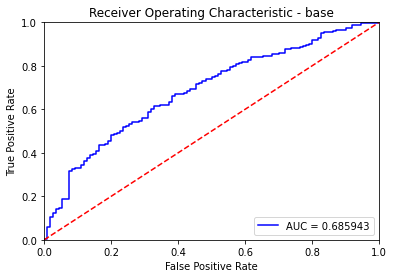

In [135]:
#AUC_ROC
preds_elastic = y_val_preds_prob_elastic[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds_elastic)
roc_auc_elastic = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_elastic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [136]:
np.round(lr_elastic.coef_,1)

array([[ 0.5,  0. , -0.1,  0.2, -0.1,  0.2,  0.4, -0.4,  0.1,  0. ,  0.1,
         0. ,  0.3,  0.1, -0.2,  0.3, -0.2,  0.2, -0.1]])

In [137]:
#elasticnet - with l1 ratio
lr_elastic1 = LogisticRegression(penalty = 'elasticnet',l1_ratio=0.4, solver='saga')
lr_elastic1.fit(x_train, y_train)
y_val_preds_elastic1 = lr_elastic1.predict(x_val)
y_val_preds_prob_elastic1 = lr_elastic1.predict_proba(x_val)

#save model as logistic 
dump(lr,  '../models/logistic_elastic1.joblib')

['../models/logistic_elastic1.joblib']

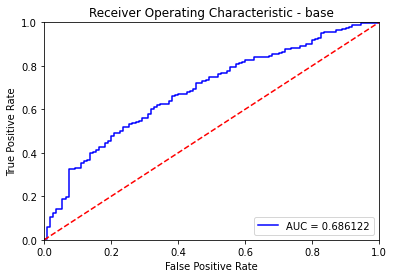

In [138]:
#AUC_ROC
preds_elastic1 = y_val_preds_prob_elastic1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val,preds_elastic1)
roc_auc_elastic1 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - base')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc_elastic1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
np.round(lr_elastic1.coef_,1)

array([[ 0.5,  0. , -0. ,  0.1, -0. ,  0.2,  0.4, -0.4,  0.1,  0. ,  0.1,
         0. ,  0.3,  0.1, -0.2,  0.3, -0.2,  0.2, -0.1]])

In [140]:
co_efficients=np.vstack((np.round(lr.coef_,1),np.round(lr_l1.coef_,1),np.round(lr_l2.coef_,1),np.round(lr_elastic.coef_,1),np.round(lr_elastic1.coef_,1)))

In [141]:
pd.DataFrame(co_efficients, columns=df_train_original.columns)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.5,0.0,-1.2,1.3,-0.2,0.1,0.5,-0.5,0.1,0.1,0.3,0.1,0.6,0.9,-1.4,0.3,-0.2,0.2,-0.1
1,0.5,0.0,0.0,0.1,0.0,0.2,0.5,-0.5,0.1,0.0,0.1,0.0,0.4,0.3,-0.5,0.3,-0.1,0.2,-0.1
2,0.5,0.0,-0.5,0.6,-0.1,0.2,0.5,-0.5,0.1,0.0,0.2,0.0,0.5,0.5,-0.8,0.3,-0.2,0.2,-0.1
3,0.5,0.0,-0.1,0.2,-0.1,0.2,0.4,-0.4,0.1,0.0,0.1,0.0,0.3,0.1,-0.2,0.3,-0.2,0.2,-0.1
4,0.5,0.0,-0.0,0.1,-0.0,0.2,0.4,-0.4,0.1,0.0,0.1,0.0,0.3,0.1,-0.2,0.3,-0.2,0.2,-0.1


Week1: AUC ROC for all the model <br>
0 - Logistic regression - 0.706288 <br>
1 - Logistic with L1 regularisation - 0.705935 <br>
2 - Logistic with L2 regularisation - 0.706100  <br>
3 - Logistic with elastic net - 0.705746 <br>
4 - Logistic with elastic and L1 ratio -0.705682 <br>

Week2 Exp1: AUC ROC for all the model (after removing negative values): <br>
0 - Logistic regression - 0.65851 <br>
1 - Logistic with L1 regularisation - 0.6853 <br>
2 - Logistic with L2 regularisation - 0.6850  <br>
3 - Logistic with elastic net - 0.6859 <br>
4 - Logistic with elastic and L1 ratio - 0.6860 <br>

###  4. Experiment Conclusion
Removing negative values in the data does not improve model performance from AUC results. It could be that the dataset is reduced in half and there are not enough patterns to learn. Therefore, this experiment of removing negative values is not taken into the next experiments. 

In [150]:
#using L2 to predict test set 
#standardising test data 

df_test = df_test_original.drop(['Id','Id_old'], axis=1)
df_test = scaler.fit_transform(df_test)
y_test = lr_l2.predict_proba(df_test)


In [151]:
print(y_test)

[[0.15098024 0.84901976]
 [0.14130059 0.85869941]
 [0.06522145 0.93477855]
 ...
 [0.25757181 0.74242819]
 [0.03925129 0.96074871]
 [0.2160066  0.7839934 ]]


In [152]:
final_pred =pd.DataFrame(y_test[:,1], index=df_test_original['Id'])
final_pred.rename( columns={0 :'TARGET_5Yrs'}, inplace=True )

In [153]:
final_pred.to_csv('../data/processed/Assignment1_week2.csv' )